In [1]:
import numpy as np
import pandas as pd
import time

# plots

import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [3]:
df.rename(columns={'px1 ':'px1'}, inplace=True)

In [4]:
df.shape

(100000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


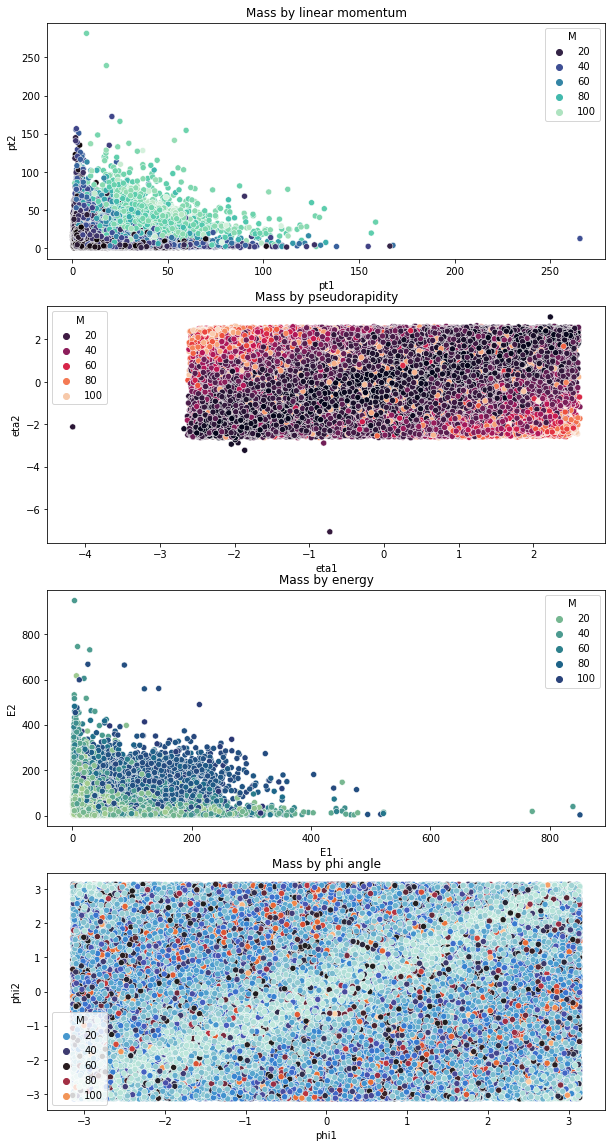

In [6]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(10,20))

sns.scatterplot(ax= ax[0],data=df, x='pt1', y='pt2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='mako')
ax[0].set_title('Mass by linear momentum')
sns.scatterplot(ax= ax[1],data=df, x='eta1', y='eta2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='rocket')
ax[1].set_title('Mass by pseudorapidity')
sns.scatterplot(ax= ax[2],data=df, x='E1', y='E2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='crest')
ax[2].set_title('Mass by energy')
sns.scatterplot(ax= ax[3],data=df, x='phi1', y='phi2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='icefire')
ax[3].set_title('Mass by phi angle')

plt.show()

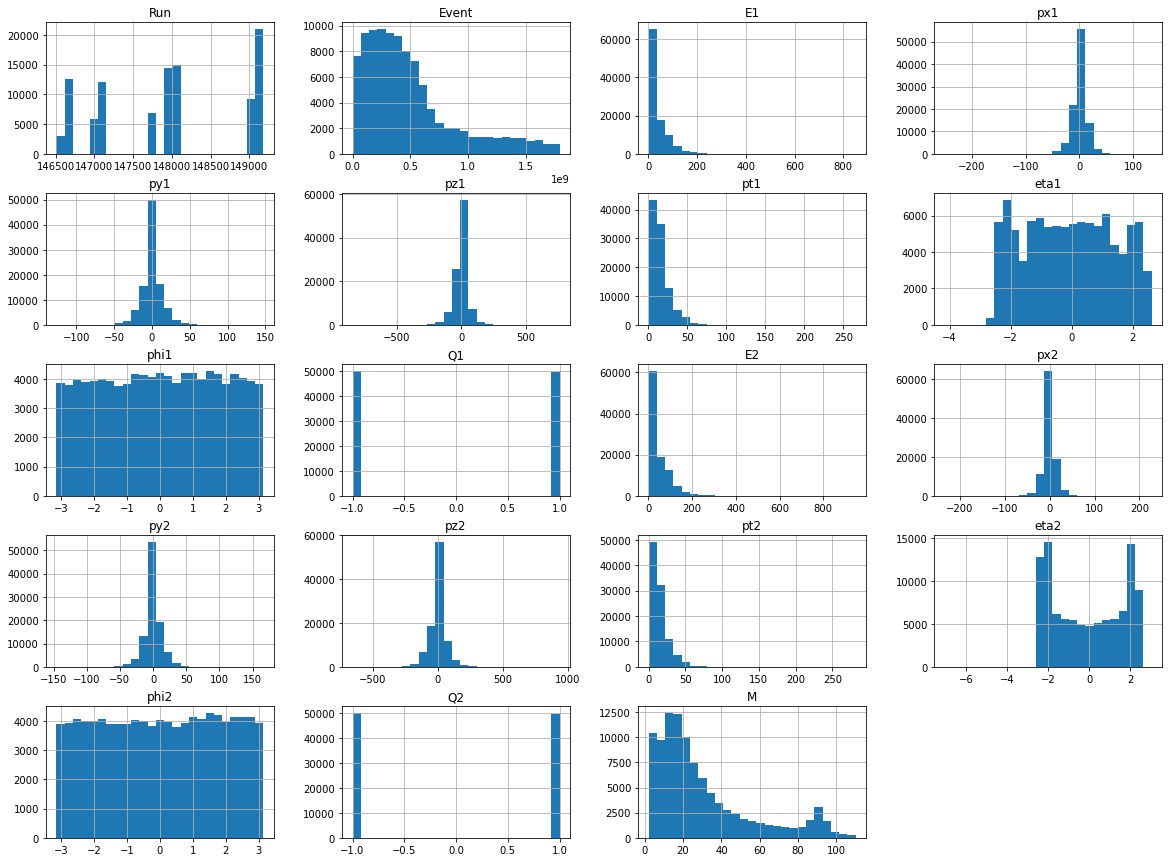

In [6]:
df.hist(bins=25, figsize=(20, 15))
plt.show()

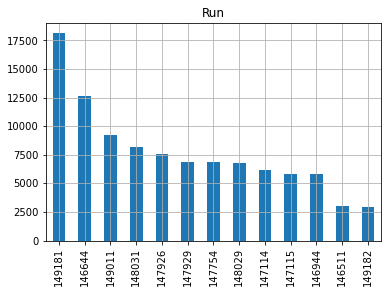

In [8]:
df.Run.value_counts().plot(kind='bar')
plt.grid()
plt.title('Run')
plt.show()

In [7]:
multis = df.Event.value_counts() 
multis = multis[multis.values>1] 
multis

439950319    3
440012942    3
542369397    2
541746848    2
407103633    2
407076179    2
406690266    2
338078762    2
337851094    2
337653458    2
337473110    2
518989177    2
541698960    2
519135297    2
541649129    2
418006834    2
542510767    2
542302783    2
541673578    2
541668133    2
541754934    2
541661621    2
Name: Event, dtype: int64

In [8]:
multis_ids = multis.index.to_list()
print(multis_ids)

df[df.Event.isin(multis_ids)].sort_values('Event')

[439950319, 440012942, 542369397, 541746848, 407103633, 407076179, 406690266, 338078762, 337851094, 337653458, 337473110, 518989177, 541698960, 519135297, 541649129, 418006834, 542510767, 542302783, 541673578, 541668133, 541754934, 541661621]


,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
97032,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
96984,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
97033,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96985,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96986,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97034,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97035,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
96987,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
97015,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660
96988,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660


In [9]:
df[df.Event==418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
39064,147114,418006834,18.7789,5.74359,7.40263,-16.27450,9.36951,-1.319410,0.910934,1,61.61360,23.14570,5.76582,-56.80910,23.8530,-1.602350,0.244141,1,10.66540
79612,148029,418006834,21.8398,-19.43140,-9.03848,-4.20742,21.43070,-0.195087,-2.706210,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.842080,1,3.76546


In [10]:
df.loc[39064,'Event'] = 418006833 # use a number that is not yet in use!
# and adjust our duplicate list
multis_ids.remove(418006834)
# check:
df[df.Event==418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
79612,148029,418006834,21.8398,-19.4314,-9.03848,-4.20742,21.4307,-0.195087,-2.70621,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.84208,1,3.76546


In [11]:
df = df.drop_duplicates(subset='Event')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99977 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     99977 non-null  int64  
 1   Event   99977 non-null  int64  
 2   E1      99977 non-null  float64
 3   px1     99977 non-null  float64
 4   py1     99977 non-null  float64
 5   pz1     99977 non-null  float64
 6   pt1     99977 non-null  float64
 7   eta1    99977 non-null  float64
 8   phi1    99977 non-null  float64
 9   Q1      99977 non-null  int64  
 10  E2      99977 non-null  float64
 11  px2     99977 non-null  float64
 12  py2     99977 non-null  float64
 13  pz2     99977 non-null  float64
 14  pt2     99977 non-null  float64
 15  eta2    99977 non-null  float64
 16  phi2    99977 non-null  float64
 17  Q2      99977 non-null  int64  
 18  M       99892 non-null  float64
dtypes: float64(15), int64(4)
memory usage: 15.3 MB


In [13]:
print(df.isnull().sum())

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64


In [14]:
print(df.isnull().all())

Run      False
Event    False
E1       False
px1      False
py1      False
pz1      False
pt1      False
eta1     False
phi1     False
Q1       False
E2       False
px2      False
py2      False
pz2      False
pt2      False
eta2     False
phi2     False
Q2       False
M        False
dtype: bool


In [15]:
df = df.dropna(subset='M')

In [16]:
print(df.isnull().sum()) 

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99892 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     99892 non-null  int64  
 1   Event   99892 non-null  int64  
 2   E1      99892 non-null  float64
 3   px1     99892 non-null  float64
 4   py1     99892 non-null  float64
 5   pz1     99892 non-null  float64
 6   pt1     99892 non-null  float64
 7   eta1    99892 non-null  float64
 8   phi1    99892 non-null  float64
 9   Q1      99892 non-null  int64  
 10  E2      99892 non-null  float64
 11  px2     99892 non-null  float64
 12  py2     99892 non-null  float64
 13  pz2     99892 non-null  float64
 14  pt2     99892 non-null  float64
 15  eta2    99892 non-null  float64
 16  phi2    99892 non-null  float64
 17  Q2      99892 non-null  int64  
 18  M       99892 non-null  float64
dtypes: float64(15), int64(4)
memory usage: 15.2 MB


In [18]:
df_norm = df.copy()

In [21]:
datcorr = df.drop(["Run","Event"],axis=1)

In [22]:
corrPe= datcorr.corr(method="pearson")

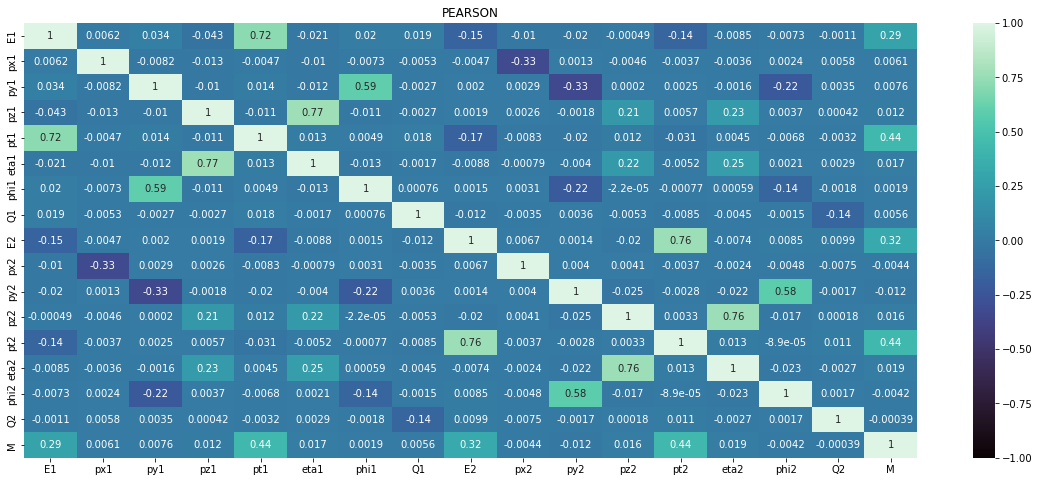

In [23]:
figure = plt.figure(figsize=(20,8))
sns.heatmap(corrPe,annot=True,vmin=-1,center=0,vmax=1, cmap='mako')
plt.title("PEARSON")
plt.show()

E1 and pt1, py1 and phi1, pz1 and eta1, E2 and pt2, py2 and phi2, pz2 and eta2 

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df.columns
vif["vif_Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

,features,vif_Factor
0,Run,5.147771
1,Event,2.531345
2,E1,2.160088
3,px1,1.120087
4,py1,1.661406
5,pz1,2.486832
6,pt1,2.553705
7,eta1,2.508455
8,phi1,1.546857
9,Q1,1.020756


VIF > 10 is our threshold for multicollinearity, seems we can use most of the features here without issues.

In [19]:
features = ['E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 
                'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2']

In [20]:
Dataset = df.copy()

We don't need Run and Event

In [21]:
Dataset = Dataset.drop(["Run","Event"],axis=1)

This time, We do the Feature Engineering for low correlated features

In [22]:
Dataset['px12'] = Dataset.px1 * Dataset.px2
Dataset['py12'] = Dataset.py1 * Dataset.py2
Dataset['pz12'] = Dataset.pz1 * Dataset.pz2
Dataset['pt12'] = Dataset.pt1 * Dataset.pt2
Dataset['eta12'] = Dataset.eta1 * Dataset.eta2
Dataset['phi12'] = Dataset.phi1 * Dataset.phi2
Dataset['E12'] = Dataset.E1 * Dataset.E2

In [29]:
corrD = Dataset.copy()
corrD = corrD.drop(features, axis=1)

In [30]:
newdf = corrD.copy()

In [31]:
corrPe= corrD.corr(method="pearson")

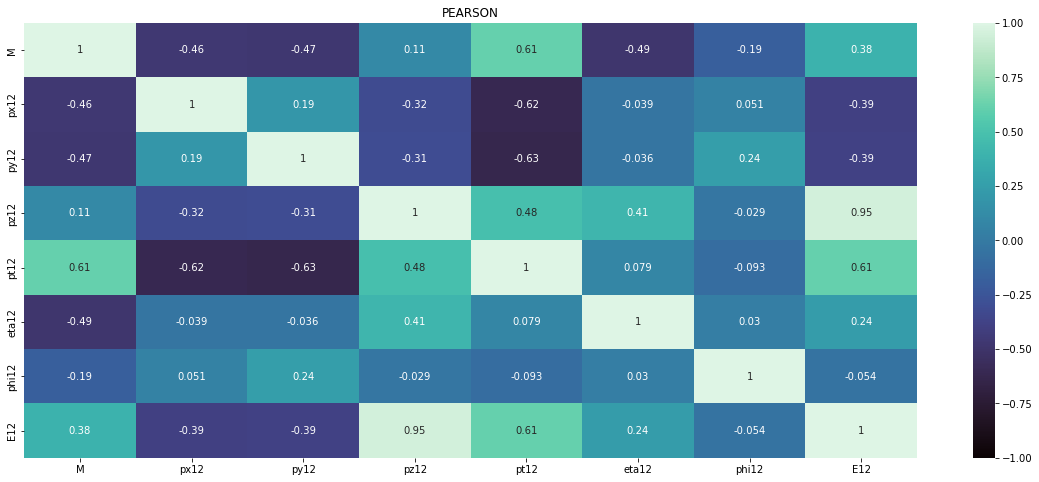

In [32]:
figure = plt.figure(figsize=(20,8))
sns.heatmap(corrPe,annot=True,vmin=-1,center=0,vmax=1, cmap='mako')
plt.title("PEARSON")
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = Dataset.columns
vif["vif_Factor"] = [variance_inflation_factor(Dataset.values, i) for i in range(Dataset.shape[1])]
vif

,features,vif_Factor
0,E1,6.227102
1,px1,1.121206
2,py1,1.662569
3,pz1,2.490213
4,pt1,9.827923
5,eta1,2.516832
6,phi1,1.548041
7,Q1,1.020709
8,E2,8.077487
9,px2,1.120723


Seems like pz12 and E12 have multicollinearity problems, pz12 has 0.11 and E12 has 0.38 corr with M we drop them.

In [23]:
Dataset = Dataset.drop(['pz12'], axis=1)

In [24]:
Dataset.head()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,...,eta2,phi2,Q2,M,px12,py12,pt12,eta12,phi12,E12
0,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,...,-2.344030,-2.072810,-1,8.94841,7.547768,-19.805230,27.504072,5.163125,-4.513875,662.506419
1,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,...,0.808077,2.734920,1,15.89300,48.635975,-2.925218,53.468448,-0.831043,-8.212527,113.388452
2,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,...,-2.455080,2.148570,1,38.38770,16.909070,4.612053,31.445869,-3.487392,6.371799,404.080521
3,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,...,2.330210,0.565865,-1,3.72862,30.708577,30.863785,68.097844,5.169291,0.569945,1643.222398
4,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,...,-2.423700,-1.684810,-1,2.74718,-0.820172,35.468821,36.421307,5.074622,2.310784,853.367850


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = Dataset.columns
vif["vif_Factor"] = [variance_inflation_factor(Dataset.values, i) for i in range(Dataset.shape[1])]
vif

,features,vif_Factor
0,E1,6.194262
1,px1,1.121168
2,py1,1.662531
3,pz1,2.490199
4,pt1,7.701021
5,eta1,2.516831
6,phi1,1.548022
7,Q1,1.020686
8,E2,8.077471
9,px2,1.120584


In [62]:
import statsmodels.api as sma
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
X2  = sma.add_constant(X)
_1  = sma.OLS(Y, X2)
_2  = _1.fit()
print(_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 2.204e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:23:22   Log-Likelihood:            -3.7794e+05
No. Observations:               99892   AIC:                         7.559e+05
Df Residuals:                   99870   BIC:                         7.561e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4148      0.095    130.249      0.0

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.cross_decomposition import PLSRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [38]:
def train_models(X_Train, Y_Train, X_Test, Y_Test):
    svr = SVR(verbose=False).fit(X_Train,Y_Train)
    Dtr = DecisionTreeRegressor(random_state=42).fit(X_Train,Y_Train)
    catbr = CatBoostRegressor(verbose=False, random_state=42).fit(X_Train,Y_Train)
    elasticnet = ElasticNet(random_state =42).fit(X_Train,Y_Train)
    gbmr = GradientBoostingRegressor(verbose=False).fit(X_Train,Y_Train)
    knnr = KNeighborsRegressor().fit(X_Train,Y_Train)
    lasso = Lasso().fit(X_Train,Y_Train)
    lgbmr = LGBMRegressor().fit(X_Train,Y_Train)
    pls = PLSRegression().fit(X_Train,Y_Train)
    rfr = RandomForestRegressor(random_state=42).fit(X_Train,Y_Train)
    ridge = Ridge().fit(X_Train,Y_Train)
    xgbr = XGBRegressor().fit(X_Train, Y_Train)

    models = [svr, Dtr, catbr, elasticnet, gbmr, knnr, lasso, lgbmr, pls, rfr, ridge, xgbr]
    for model in models:
        name = model.__class__.__name__
        R2CV = cross_val_score(model, X_Test, Y_Test,cv=10,scoring="r2").mean()
        error = -cross_val_score(model, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
        print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

In [42]:
Df1 = df.copy()
Df1 = Df1.drop(['Run', 'Event', 'Q1', 'Q2'], axis=1)
Y = Df1['M']
X = Df1.drop("M", axis=1)

In [43]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [46]:
X_Train.head()

,E1,px1,py1,pz1,pt1,eta1,phi1,E2,px2,py2,pz2,pt2,eta2,phi2
39786,9.02300,1.559590,-2.08651,-8.63879,2.60496,-1.913990,-0.928919,69.5372,10.324300,-10.85550,-67.9043,14.98110,-2.21641,-0.810472
59689,3.74557,-0.144469,-2.36742,-2.89892,2.37182,-1.030130,-1.631740,71.3817,7.995590,13.28110,-69.6780,15.50220,-2.20820,1.028890
97346,92.71270,26.512900,-16.09090,-87.37160,31.01370,-1.758990,-0.545484,39.6909,9.312370,-6.73730,-37.9902,11.49400,-1.91079,-0.626310
88961,7.64805,-4.883100,-2.45481,5.34994,5.46541,0.866355,-2.675780,100.0130,14.004100,19.25180,97.1388,23.80650,2.11402,0.941906
8884,98.51750,3.910140,-30.10360,93.72400,30.35650,1.845740,-1.441630,10.4315,-0.197744,2.76986,-10.0551,2.77691,-1.99844,1.642070


In [59]:
train_models(X_Train, Y_Train, X_Test, Y_Test)

Name: SVR R2 Score: 0.83517 RMSE: 10.24700
Name: DecisionTreeRegressor R2 Score: 0.66747 RMSE: 14.55148
Name: CatBoostRegressor R2 Score: 0.99037 RMSE: 2.47511
Name: ElasticNet R2 Score: 0.39832 RMSE: 19.56982
Name: GradientBoostingRegressor R2 Score: 0.74486 RMSE: 12.74279
Name: KNeighborsRegressor R2 Score: 0.88614 RMSE: 8.51229
Name: Lasso R2 Score: 0.39835 RMSE: 19.56938
Name: LGBMRegressor R2 Score: 0.95843 RMSE: 5.14299
Name: PLSRegression R2 Score: 0.39183 RMSE: 19.67583
Name: RandomForestRegressor R2 Score: 0.90155 RMSE: 7.91384
Name: Ridge R2 Score: 0.39804 RMSE: 19.57434
Name: XGBRegressor R2 Score: 0.96420 RMSE: 4.77334


In [35]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
train_models(X_Train, Y_Train, X_Test, Y_Test)

Name: SVR R2 Score: 0.45997 RMSE: 18.55062
Name: DecisionTreeRegressor R2 Score: 0.97820 RMSE: 3.72371
Name: CatBoostRegressor R2 Score: 0.99699 RMSE: 1.38363
Name: ElasticNet R2 Score: 0.81897 RMSE: 10.73765
Name: GradientBoostingRegressor R2 Score: 0.98590 RMSE: 2.99343
Name: KNeighborsRegressor R2 Score: 0.67271 RMSE: 14.43769
Name: Lasso R2 Score: 0.82125 RMSE: 10.66939
Name: LGBMRegressor R2 Score: 0.99401 RMSE: 1.95138
Name: PLSRegression R2 Score: 0.79007 RMSE: 11.56486
Name: RandomForestRegressor R2 Score: 0.99092 RMSE: 2.40208
Name: Ridge R2 Score: 0.82179 RMSE: 10.65290
Name: XGBRegressor R2 Score: 0.99333 RMSE: 2.05787


Catboost, XGBoost and LGBM have a good R2 score, CATboost being the best 

Catboost on the original dataset, Hyperparameter Tuned

In [77]:
Df1 = df.copy()
Df1 = Df1.drop(['Run', 'Event', 'Q1', 'Q2'], axis=1)
Y = Df1['M']
X = Df1.drop("M", axis=1)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)
catbr = CatBoostRegressor(subsample=0.6571165219995333, od_wait=46, colsample_bylevel=0.6900521591366188, random_strength=2, l2_leaf_reg=3.3108471723733297, max_depth=9, n_estimators=2215,learning_rate=0.07942397557433238,verbose=False, random_seed=99).fit(X_Train,Y_Train)
name = catbr.__class__.__name__
R2CV = cross_val_score(catbr, X_Test, Y_Test,cv=10,scoring="r2").mean()
error = -cross_val_score(catbr, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: CatBoostRegressor R2 Score: 0.99405 RMSE: 1.94644


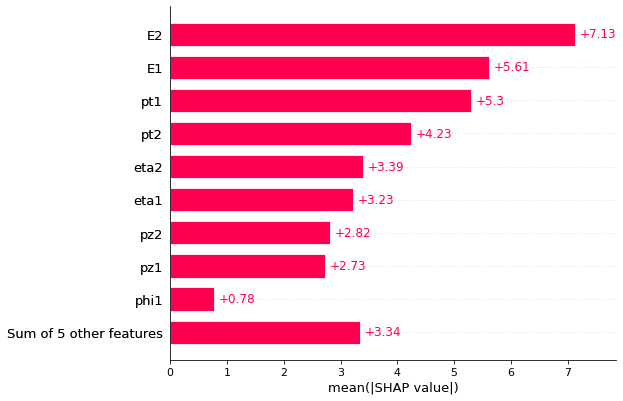

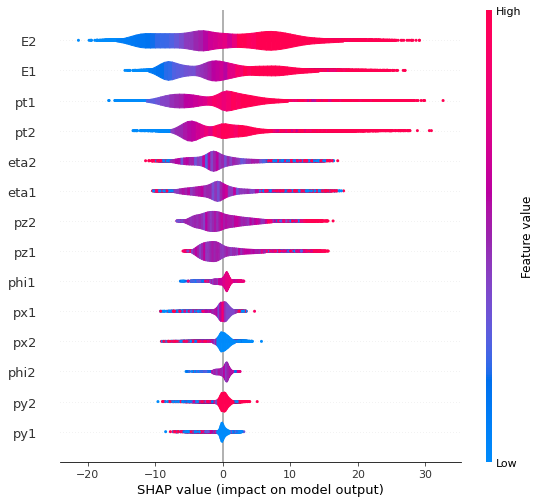

In [28]:
import shap
explainer = shap.Explainer(catbr)
shap_values = explainer(X_Train)
shap.plots.bar(shap_values)
shap.summary_plot(shap_values, plot_type='violin')

In [78]:
y_pred = catbr.predict(X_Test)

In [40]:
len(Y_Test)

19979

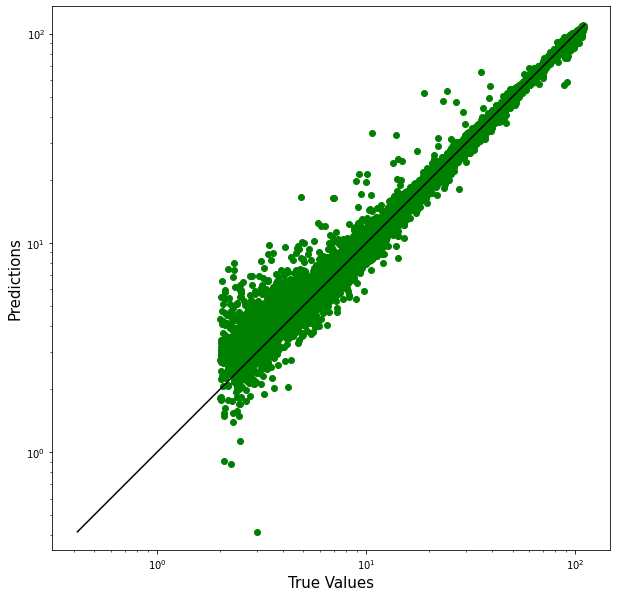

In [106]:
plt.figure(figsize=(10,10))
plt.scatter(Y_Test, y_pred, c='green')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(Y_Test))
p2 = min(min(y_pred), min(Y))
plt.plot([p1, p2], [p1, p2], 'black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(27.0, 0.5, 'Predicted Value M')

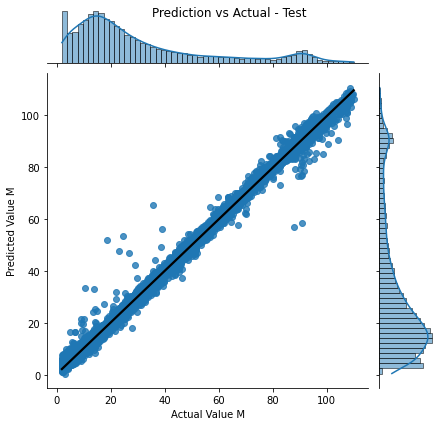

In [98]:
p=sns.jointplot(Y_Test, y_pred, kind="reg",
              joint_kws=dict(line_kws =dict(color = "black")))
p.fig.suptitle('Prediction vs Actual - Test')
p.ax_joint.set_xlabel("Actual Value M")
p.ax_joint.set_ylabel("Predicted Value M")

In [105]:
from sklearn.metrics import r2_score
rmse = (np.sqrt(mean_squared_error(Y_Test, y_pred)))
r2 = r2_score(Y_Test, y_pred)
print("Testing performance")
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

Testing performance
RMSE: 1.32915
R2: 0.99723


CatBoost with simple tuned HyperParameters on new dataset.

In [107]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)
catbr = CatBoostRegressor(subsample=0.6571165219995333, od_wait=46, colsample_bylevel=0.6900521591366188, random_strength=2, l2_leaf_reg=3.3108471723733297, max_depth=9, n_estimators=2215,learning_rate=0.07942397557433238,verbose=False, random_seed=99).fit(X_Train,Y_Train)
name = catbr.__class__.__name__
R2CV = cross_val_score(catbr, X_Test, Y_Test,cv=10,scoring="r2").mean()
error = -cross_val_score(catbr, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: CatBoostRegressor R2 Score: 0.99710 RMSE: 1.35979


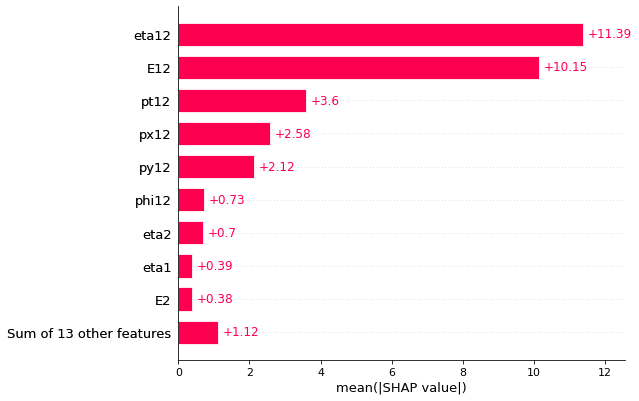

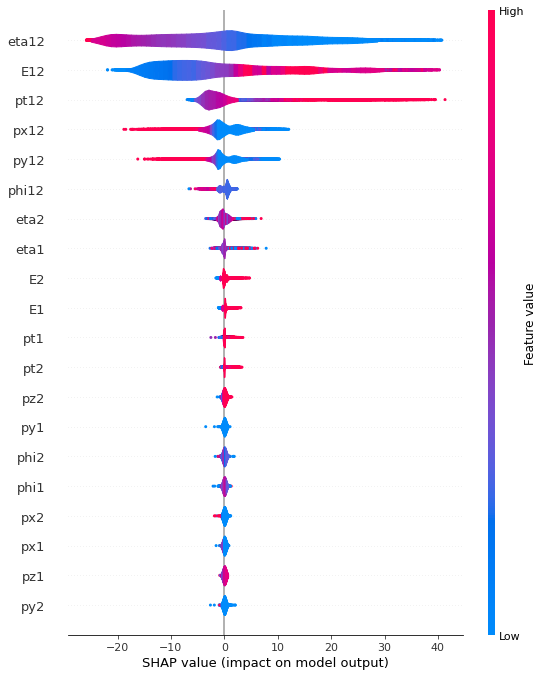

In [48]:
import shap
explainer = shap.Explainer(catbr)
shap_values = explainer(X_Train)
shap.plots.bar(shap_values)
shap.summary_plot(shap_values, plot_type='violin')

In [108]:
y_pred = catbr.predict(X_Test)

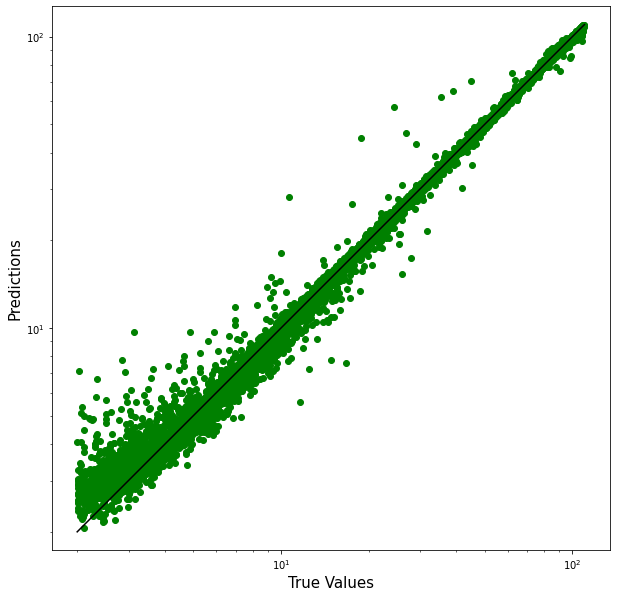

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(Y_Test, y_pred, c='green')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(Y_Test))
p2 = min(min(y_pred), min(Y))
plt.plot([p1, p2], [p1, p2], 'black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(27.0, 0.5, 'Predicted Value M')

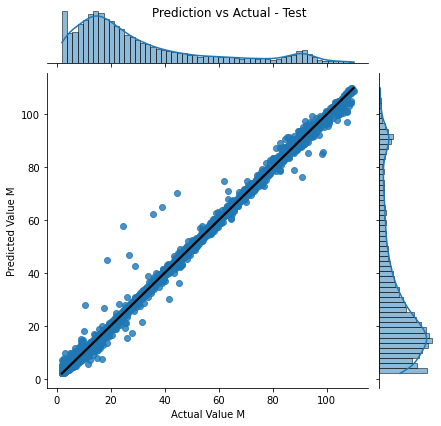

In [110]:
p=sns.jointplot(Y_Test, y_pred, kind="reg",
              joint_kws=dict(line_kws =dict(color = "black")))
p.fig.suptitle('Prediction vs Actual - Test')
p.ax_joint.set_xlabel("Actual Value M")
p.ax_joint.set_ylabel("Predicted Value M")

In [111]:
from sklearn.metrics import r2_score
rmse = (np.sqrt(mean_squared_error(Y_Test, y_pred)))
r2 = r2_score(Y_Test, y_pred)
print("Testing performance")
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

Testing performance
RMSE: 0.84838
R2: 0.99887


In [46]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [28]:
import optuna
from sklearn.metrics import accuracy_score
from optuna.samplers import TPESampler

In [29]:
def objective(trial):
    
    optuna_params = {"subsample": trial.suggest_float("subsample", 0.5, 0.99),
                     'od_wait': trial.suggest_int('od_wait', 10, 50, step=1),
                     "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 0.99),
                     "random_strength": trial.suggest_int("random_strength", 1, 10, step=1),
                     "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 50.0),
                     "max_depth": trial.suggest_int("max_depth", 4, 10, step=1),
                     "n_estimators": trial.suggest_int("n_estimators", 100, 2500, step=1),
                     'learning_rate': trial.suggest_float("learning_rate", 0.005, 0.1)}

    cbregressor = CatBoostRegressor(**optuna_params, 
                                       random_state=0,
                                       loss_function='RMSE', 
                                       eval_metric='RMSE', 
                                       one_hot_max_size=0,
                                       boost_from_average=True)
    
    cat_optuna = cbregressor.fit(X_Train,Y_Train, verbose=False, early_stopping_rounds=10)
    
    y_valid_pred_cat3 = cat_optuna.predict(X_Test)
    
    RMSE = np.sqrt(mean_squared_error(Y_Test, y_valid_pred_cat3))
    print('RMSE score of CatBoost =', RMSE)
    return RMSE

In [30]:
study = optuna.create_study(direction="minimize", sampler = TPESampler(seed=0), study_name="Catboost Optuna")
study.optimize(objective, n_trials=100, n_jobs=-1)

[I 2022-09-21 17:34:18,793] A new study created in memory with name: Catboost Optuna
[I 2022-09-21 17:35:08,470] Trial 6 finished with value: 2.750711499385086 and parameters: {'subsample': 0.7160497932556181, 'od_wait': 18, 'colsample_bylevel': 0.7506420177883166, 'random_strength': 5, 'l2_leaf_reg': 7.290420986048574, 'max_depth': 7, 'n_estimators': 550, 'learning_rate': 0.01825350225738309}. Best is trial 6 with value: 2.750711499385086.


RMSE score of CatBoost = 2.750711499385086


[I 2022-09-21 17:35:20,790] Trial 0 finished with value: 1.7296932268612057 and parameters: {'subsample': 0.9528721097090516, 'od_wait': 17, 'colsample_bylevel': 0.8463967062065797, 'random_strength': 10, 'l2_leaf_reg': 14.859894574774268, 'max_depth': 4, 'n_estimators': 1260, 'learning_rate': 0.05524051891048702}. Best is trial 0 with value: 1.7296932268612057.


RMSE score of CatBoost = 1.7296932268612057


[I 2022-09-21 17:35:30,057] Trial 3 finished with value: 1.6269371657116505 and parameters: {'subsample': 0.9672730869641895, 'od_wait': 40, 'colsample_bylevel': 0.8486268034851419, 'random_strength': 6, 'l2_leaf_reg': 33.656766257858386, 'max_depth': 5, 'n_estimators': 1146, 'learning_rate': 0.05145607216886505}. Best is trial 3 with value: 1.6269371657116505.


RMSE score of CatBoost = 1.6269371657116505


[I 2022-09-21 17:35:36,056] Trial 7 finished with value: 1.3966106295692828 and parameters: {'subsample': 0.9322681715904797, 'od_wait': 12, 'colsample_bylevel': 0.8515747181024699, 'random_strength': 1, 'l2_leaf_reg': 35.80863871188082, 'max_depth': 5, 'n_estimators': 1273, 'learning_rate': 0.07109606820629301}. Best is trial 7 with value: 1.3966106295692828.


RMSE score of CatBoost = 1.3966106295692828


[I 2022-09-21 17:35:41,813] Trial 11 finished with value: 3.727404645259065 and parameters: {'subsample': 0.6993549161255641, 'od_wait': 23, 'colsample_bylevel': 0.6993236355246853, 'random_strength': 2, 'l2_leaf_reg': 19.67104170699825, 'max_depth': 4, 'n_estimators': 112, 'learning_rate': 0.0939612463568928}. Best is trial 7 with value: 1.3966106295692828.


RMSE score of CatBoost = 3.727404645259065


[I 2022-09-21 17:35:44,091] Trial 5 finished with value: 1.317967101358599 and parameters: {'subsample': 0.5329737390976691, 'od_wait': 41, 'colsample_bylevel': 0.6405544706584815, 'random_strength': 9, 'l2_leaf_reg': 14.24663312672515, 'max_depth': 6, 'n_estimators': 1456, 'learning_rate': 0.05005816563150283}. Best is trial 5 with value: 1.317967101358599.


RMSE score of CatBoost = 1.317967101358599


[I 2022-09-21 17:35:52,876] Trial 2 finished with value: 1.6968358457699786 and parameters: {'subsample': 0.6245649867845843, 'od_wait': 11, 'colsample_bylevel': 0.623891398797692, 'random_strength': 7, 'l2_leaf_reg': 25.187282010025005, 'max_depth': 8, 'n_estimators': 844, 'learning_rate': 0.03268962593010324}. Best is trial 5 with value: 1.317967101358599.


RMSE score of CatBoost = 1.6968358457699786


[I 2022-09-21 17:35:59,616] Trial 10 finished with value: 1.8305397807401593 and parameters: {'subsample': 0.860716272731517, 'od_wait': 15, 'colsample_bylevel': 0.8805014026226461, 'random_strength': 5, 'l2_leaf_reg': 5.32265610503481, 'max_depth': 6, 'n_estimators': 404, 'learning_rate': 0.07785534715215331}. Best is trial 5 with value: 1.317967101358599.


RMSE score of CatBoost = 1.8305397807401593


[I 2022-09-21 17:36:06,678] Trial 8 finished with value: 1.6020679736450143 and parameters: {'subsample': 0.8555346479074875, 'od_wait': 36, 'colsample_bylevel': 0.542812599406904, 'random_strength': 10, 'l2_leaf_reg': 20.88360224433988, 'max_depth': 6, 'n_estimators': 835, 'learning_rate': 0.05896657957167112}. Best is trial 5 with value: 1.317967101358599.


RMSE score of CatBoost = 1.6020679736450143


[I 2022-09-21 17:36:10,291] Trial 4 finished with value: 1.0835366223489666 and parameters: {'subsample': 0.5830011666234666, 'od_wait': 35, 'colsample_bylevel': 0.7285727860867872, 'random_strength': 1, 'l2_leaf_reg': 8.165162616350472, 'max_depth': 8, 'n_estimators': 977, 'learning_rate': 0.09856368820692198}. Best is trial 4 with value: 1.0835366223489666.


RMSE score of CatBoost = 1.0835366223489666


[I 2022-09-21 17:36:14,926] Trial 13 finished with value: 1.9186727596450104 and parameters: {'subsample': 0.6595572246784831, 'od_wait': 35, 'colsample_bylevel': 0.9545594031333371, 'random_strength': 6, 'l2_leaf_reg': 41.35784939998617, 'max_depth': 5, 'n_estimators': 578, 'learning_rate': 0.07011823413226403}. Best is trial 4 with value: 1.0835366223489666.


RMSE score of CatBoost = 1.9186727596450104


[I 2022-09-21 17:36:57,535] Trial 1 finished with value: 1.1327390133725392 and parameters: {'subsample': 0.5178333585639031, 'od_wait': 22, 'colsample_bylevel': 0.5926548353655974, 'random_strength': 5, 'l2_leaf_reg': 11.740792740889908, 'max_depth': 8, 'n_estimators': 1536, 'learning_rate': 0.050635667148566696}. Best is trial 4 with value: 1.0835366223489666.


RMSE score of CatBoost = 1.1327390133725392


[I 2022-09-21 17:37:05,319] Trial 15 finished with value: 1.5583914781537571 and parameters: {'subsample': 0.603869337146973, 'od_wait': 11, 'colsample_bylevel': 0.6663273983230428, 'random_strength': 10, 'l2_leaf_reg': 4.5726652900995575, 'max_depth': 5, 'n_estimators': 1128, 'learning_rate': 0.05294788949483826}. Best is trial 4 with value: 1.0835366223489666.


RMSE score of CatBoost = 1.5583914781537571


[I 2022-09-21 17:38:22,683] Trial 12 finished with value: 2.936315249708721 and parameters: {'subsample': 0.8878433998146631, 'od_wait': 21, 'colsample_bylevel': 0.6707431405990525, 'random_strength': 10, 'l2_leaf_reg': 23.52180102575931, 'max_depth': 5, 'n_estimators': 2023, 'learning_rate': 0.007750066929686321}. Best is trial 4 with value: 1.0835366223489666.


RMSE score of CatBoost = 2.936315249708721


[I 2022-09-21 17:39:13,671] Trial 9 finished with value: 1.352071802458913 and parameters: {'subsample': 0.8154838512783291, 'od_wait': 29, 'colsample_bylevel': 0.8027060203723103, 'random_strength': 9, 'l2_leaf_reg': 41.62018004054214, 'max_depth': 8, 'n_estimators': 1274, 'learning_rate': 0.04936238202185191}. Best is trial 4 with value: 1.0835366223489666.


RMSE score of CatBoost = 1.352071802458913


[I 2022-09-21 17:39:33,272] Trial 14 finished with value: 1.187445026390519 and parameters: {'subsample': 0.7571996205560185, 'od_wait': 28, 'colsample_bylevel': 0.8718006428986741, 'random_strength': 4, 'l2_leaf_reg': 2.6475532051388324, 'max_depth': 8, 'n_estimators': 1053, 'learning_rate': 0.05359828828977583}. Best is trial 4 with value: 1.0835366223489666.


RMSE score of CatBoost = 1.187445026390519


[I 2022-09-21 17:44:30,691] Trial 16 finished with value: 1.2757628383938717 and parameters: {'subsample': 0.5763828076685213, 'od_wait': 27, 'colsample_bylevel': 0.6020395491877997, 'random_strength': 6, 'l2_leaf_reg': 42.0875699855611, 'max_depth': 10, 'n_estimators': 1331, 'learning_rate': 0.053093679877127604}. Best is trial 4 with value: 1.0835366223489666.


RMSE score of CatBoost = 1.2757628383938717


[I 2022-09-21 17:46:05,674] Trial 19 finished with value: 1.0113588780310474 and parameters: {'subsample': 0.5060890696867218, 'od_wait': 28, 'colsample_bylevel': 0.5099195257295093, 'random_strength': 3, 'l2_leaf_reg': 3.5965437839461485, 'max_depth': 9, 'n_estimators': 2157, 'learning_rate': 0.09994090892332345}. Best is trial 19 with value: 1.0113588780310474.


RMSE score of CatBoost = 1.0113588780310474


[I 2022-09-21 17:47:37,008] Trial 21 finished with value: 1.0628045423794916 and parameters: {'subsample': 0.5234541941499146, 'od_wait': 49, 'colsample_bylevel': 0.5007066756024675, 'random_strength': 3, 'l2_leaf_reg': 11.880070254335136, 'max_depth': 10, 'n_estimators': 1687, 'learning_rate': 0.09959871788223797}. Best is trial 19 with value: 1.0113588780310474.


RMSE score of CatBoost = 1.0628045423794916


[I 2022-09-21 17:49:05,234] Trial 22 finished with value: 1.0526274908784834 and parameters: {'subsample': 0.5142585491886447, 'od_wait': 49, 'colsample_bylevel': 0.5205638806169779, 'random_strength': 3, 'l2_leaf_reg': 12.462745893252608, 'max_depth': 10, 'n_estimators': 1816, 'learning_rate': 0.09303451302175264}. Best is trial 19 with value: 1.0113588780310474.


RMSE score of CatBoost = 1.0526274908784834


[I 2022-09-21 17:49:26,219] Trial 20 finished with value: 1.0404891222229478 and parameters: {'subsample': 0.5004180819406246, 'od_wait': 49, 'colsample_bylevel': 0.5027267974023186, 'random_strength': 3, 'l2_leaf_reg': 10.879124945656624, 'max_depth': 10, 'n_estimators': 2129, 'learning_rate': 0.09491535867204969}. Best is trial 19 with value: 1.0113588780310474.


RMSE score of CatBoost = 1.0404891222229478


[I 2022-09-21 17:49:30,968] Trial 23 finished with value: 1.054438420725614 and parameters: {'subsample': 0.5025151090849423, 'od_wait': 47, 'colsample_bylevel': 0.5066323720953414, 'random_strength': 3, 'l2_leaf_reg': 11.443989548587162, 'max_depth': 10, 'n_estimators': 1649, 'learning_rate': 0.09612340527635878}. Best is trial 19 with value: 1.0113588780310474.


RMSE score of CatBoost = 1.054438420725614


[I 2022-09-21 17:50:57,538] Trial 18 finished with value: 1.0389943757417128 and parameters: {'subsample': 0.5016509308983249, 'od_wait': 50, 'colsample_bylevel': 0.7097706673134431, 'random_strength': 3, 'l2_leaf_reg': 1.0791284687835372, 'max_depth': 10, 'n_estimators': 2001, 'learning_rate': 0.09796356097955963}. Best is trial 19 with value: 1.0113588780310474.


RMSE score of CatBoost = 1.0389943757417128


[I 2022-09-21 17:54:11,833] Trial 24 finished with value: 1.0470579953542531 and parameters: {'subsample': 0.5170781089928765, 'od_wait': 45, 'colsample_bylevel': 0.5007338611118233, 'random_strength': 3, 'l2_leaf_reg': 11.236771109700358, 'max_depth': 10, 'n_estimators': 1725, 'learning_rate': 0.09851064867992564}. Best is trial 19 with value: 1.0113588780310474.


RMSE score of CatBoost = 1.0470579953542531


[I 2022-09-21 17:55:01,837] Trial 17 finished with value: 1.0614263788013918 and parameters: {'subsample': 0.5052818316261618, 'od_wait': 48, 'colsample_bylevel': 0.9512692248781929, 'random_strength': 3, 'l2_leaf_reg': 48.292555998724694, 'max_depth': 10, 'n_estimators': 2101, 'learning_rate': 0.08349921370130875}. Best is trial 19 with value: 1.0113588780310474.


RMSE score of CatBoost = 1.0614263788013918


[I 2022-09-21 17:58:41,152] Trial 27 finished with value: 1.026186958960019 and parameters: {'subsample': 0.5001315919998014, 'od_wait': 49, 'colsample_bylevel': 0.5005563240065827, 'random_strength': 3, 'l2_leaf_reg': 30.0572568270931, 'max_depth': 9, 'n_estimators': 2492, 'learning_rate': 0.08604365773278638}. Best is trial 19 with value: 1.0113588780310474.


RMSE score of CatBoost = 1.026186958960019


[I 2022-09-21 17:58:58,030] Trial 28 finished with value: 1.0140981356152896 and parameters: {'subsample': 0.558045801717117, 'od_wait': 46, 'colsample_bylevel': 0.5112985878343603, 'random_strength': 3, 'l2_leaf_reg': 16.68869888658455, 'max_depth': 9, 'n_estimators': 2475, 'learning_rate': 0.08623623797432833}. Best is trial 19 with value: 1.0113588780310474.


RMSE score of CatBoost = 1.0140981356152896


[I 2022-09-21 17:59:24,870] Trial 25 finished with value: 1.010378519968563 and parameters: {'subsample': 0.5663359237187535, 'od_wait': 45, 'colsample_bylevel': 0.5050086357292825, 'random_strength': 3, 'l2_leaf_reg': 10.489239960328106, 'max_depth': 10, 'n_estimators': 2463, 'learning_rate': 0.09694663262099826}. Best is trial 25 with value: 1.010378519968563.


RMSE score of CatBoost = 1.010378519968563


[I 2022-09-21 17:59:37,548] Trial 29 finished with value: 0.9964936342449074 and parameters: {'subsample': 0.5536688166245116, 'od_wait': 44, 'colsample_bylevel': 0.5553583440983616, 'random_strength': 3, 'l2_leaf_reg': 17.81360166035204, 'max_depth': 9, 'n_estimators': 2497, 'learning_rate': 0.08615754733363407}. Best is trial 29 with value: 0.9964936342449074.


RMSE score of CatBoost = 0.9964936342449074


[I 2022-09-21 18:00:19,847] Trial 26 finished with value: 1.0241994780103605 and parameters: {'subsample': 0.5017163367807213, 'od_wait': 50, 'colsample_bylevel': 0.5004208884901522, 'random_strength': 3, 'l2_leaf_reg': 1.5414131890410583, 'max_depth': 10, 'n_estimators': 2381, 'learning_rate': 0.0875681464803277}. Best is trial 29 with value: 0.9964936342449074.


RMSE score of CatBoost = 1.0241994780103605


[I 2022-09-21 18:00:50,881] Trial 30 finished with value: 0.9545104347682621 and parameters: {'subsample': 0.5644285020713673, 'od_wait': 45, 'colsample_bylevel': 0.5593633073696807, 'random_strength': 2, 'l2_leaf_reg': 1.9530146487291413, 'max_depth': 9, 'n_estimators': 2447, 'learning_rate': 0.0844347566877839}. Best is trial 30 with value: 0.9545104347682621.


RMSE score of CatBoost = 0.9545104347682621


[I 2022-09-21 18:02:35,611] Trial 31 finished with value: 0.9773882878834648 and parameters: {'subsample': 0.563777676225762, 'od_wait': 43, 'colsample_bylevel': 0.5688488526915936, 'random_strength': 2, 'l2_leaf_reg': 1.1280581198225281, 'max_depth': 9, 'n_estimators': 2292, 'learning_rate': 0.08724455654668525}. Best is trial 30 with value: 0.9545104347682621.


RMSE score of CatBoost = 0.9773882878834648


[I 2022-09-21 18:04:10,799] Trial 32 finished with value: 0.952345469441168 and parameters: {'subsample': 0.5680847890033675, 'od_wait': 43, 'colsample_bylevel': 0.56275715355942, 'random_strength': 2, 'l2_leaf_reg': 2.7037493625529176, 'max_depth': 9, 'n_estimators': 2482, 'learning_rate': 0.08625645186938603}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.952345469441168


[I 2022-09-21 18:07:20,656] Trial 33 finished with value: 1.0062606024592642 and parameters: {'subsample': 0.5517946279457926, 'od_wait': 42, 'colsample_bylevel': 0.5618256026263755, 'random_strength': 2, 'l2_leaf_reg': 30.947567545639103, 'max_depth': 9, 'n_estimators': 2469, 'learning_rate': 0.08514844718675132}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 1.0062606024592642


[I 2022-09-21 18:07:36,651] Trial 34 finished with value: 0.9911667788229069 and parameters: {'subsample': 0.5654830903630328, 'od_wait': 43, 'colsample_bylevel': 0.5622540980500046, 'random_strength': 2, 'l2_leaf_reg': 30.072641000753002, 'max_depth': 9, 'n_estimators': 2487, 'learning_rate': 0.08501180365568743}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.9911667788229069


[I 2022-09-21 18:07:51,741] Trial 36 finished with value: 0.9702358381699431 and parameters: {'subsample': 0.6521244636405493, 'od_wait': 42, 'colsample_bylevel': 0.5636080641119647, 'random_strength': 2, 'l2_leaf_reg': 17.725428745456558, 'max_depth': 9, 'n_estimators': 2315, 'learning_rate': 0.0777945848344819}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.9702358381699431


[I 2022-09-21 18:08:10,483] Trial 35 finished with value: 0.9695128694029536 and parameters: {'subsample': 0.5654197916559736, 'od_wait': 44, 'colsample_bylevel': 0.5658959267003967, 'random_strength': 2, 'l2_leaf_reg': 16.054176879409077, 'max_depth': 9, 'n_estimators': 2497, 'learning_rate': 0.08721687055926591}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.9695128694029536


[I 2022-09-21 18:08:24,129] Trial 37 finished with value: 0.9922880970148348 and parameters: {'subsample': 0.6334552955643146, 'od_wait': 32, 'colsample_bylevel': 0.5686273731976341, 'random_strength': 2, 'l2_leaf_reg': 16.16514514169534, 'max_depth': 9, 'n_estimators': 2255, 'learning_rate': 0.07543322878499745}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.9922880970148348


[I 2022-09-21 18:08:47,054] Trial 38 finished with value: 0.9735089325700631 and parameters: {'subsample': 0.6395030226311986, 'od_wait': 43, 'colsample_bylevel': 0.5624410871675039, 'random_strength': 2, 'l2_leaf_reg': 16.581037387923807, 'max_depth': 9, 'n_estimators': 2260, 'learning_rate': 0.08024479332079551}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.9735089325700631


[I 2022-09-21 18:11:03,828] Trial 39 finished with value: 0.9851634278366411 and parameters: {'subsample': 0.6475149812282178, 'od_wait': 43, 'colsample_bylevel': 0.5645739904108125, 'random_strength': 2, 'l2_leaf_reg': 17.13473215622771, 'max_depth': 9, 'n_estimators': 2306, 'learning_rate': 0.07748589946421475}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.9851634278366411


[I 2022-09-21 18:11:57,358] Trial 42 finished with value: 0.990114605022276 and parameters: {'subsample': 0.6384458584189205, 'od_wait': 39, 'colsample_bylevel': 0.587981269515179, 'random_strength': 1, 'l2_leaf_reg': 7.747161008492464, 'max_depth': 7, 'n_estimators': 2278, 'learning_rate': 0.07579184380555444}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.990114605022276


[I 2022-09-21 18:12:22,438] Trial 46 finished with value: 1.049212125755769 and parameters: {'subsample': 0.6062095283581008, 'od_wait': 39, 'colsample_bylevel': 0.6027493498530448, 'random_strength': 1, 'l2_leaf_reg': 7.327123405232392, 'max_depth': 7, 'n_estimators': 1867, 'learning_rate': 0.06252310543366404}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 1.049212125755769


[I 2022-09-21 18:12:23,877] Trial 40 finished with value: 0.97139285550683 and parameters: {'subsample': 0.6402087660957545, 'od_wait': 42, 'colsample_bylevel': 0.565429062208088, 'random_strength': 2, 'l2_leaf_reg': 7.744176403683737, 'max_depth': 9, 'n_estimators': 2274, 'learning_rate': 0.07680599454100645}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.97139285550683


[I 2022-09-21 18:12:51,148] Trial 44 finished with value: 0.9690498554090586 and parameters: {'subsample': 0.6401245400185827, 'od_wait': 38, 'colsample_bylevel': 0.6091492997558111, 'random_strength': 1, 'l2_leaf_reg': 6.846510444535829, 'max_depth': 7, 'n_estimators': 2253, 'learning_rate': 0.0771443644948736}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.9690498554090586


[I 2022-09-21 18:13:09,729] Trial 45 finished with value: 0.9869280007391689 and parameters: {'subsample': 0.6645574888241541, 'od_wait': 39, 'colsample_bylevel': 0.6065019218490632, 'random_strength': 1, 'l2_leaf_reg': 6.973625875395083, 'max_depth': 7, 'n_estimators': 2257, 'learning_rate': 0.06469400693993003}. Best is trial 32 with value: 0.952345469441168.


RMSE score of CatBoost = 0.9869280007391689


[I 2022-09-21 18:13:47,056] Trial 43 finished with value: 0.9424990770580621 and parameters: {'subsample': 0.6385338829253707, 'od_wait': 38, 'colsample_bylevel': 0.5923435501846525, 'random_strength': 1, 'l2_leaf_reg': 7.3156722004176356, 'max_depth': 8, 'n_estimators': 2249, 'learning_rate': 0.07653314365504864}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 0.9424990770580621


[I 2022-09-21 18:15:03,689] Trial 47 finished with value: 1.0321163479988618 and parameters: {'subsample': 0.6050630997127711, 'od_wait': 39, 'colsample_bylevel': 0.6220368761536129, 'random_strength': 1, 'l2_leaf_reg': 7.6953481354471425, 'max_depth': 7, 'n_estimators': 1921, 'learning_rate': 0.061564559391700004}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.0321163479988618


[I 2022-09-21 18:16:07,734] Trial 41 finished with value: 0.9531484573462615 and parameters: {'subsample': 0.6204067397700543, 'od_wait': 37, 'colsample_bylevel': 0.5737495120146622, 'random_strength': 2, 'l2_leaf_reg': 6.432826064763895, 'max_depth': 9, 'n_estimators': 2258, 'learning_rate': 0.07668514532661924}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 0.9531484573462615


[I 2022-09-21 18:17:17,603] Trial 48 finished with value: 1.0268789719401576 and parameters: {'subsample': 0.6113759757185052, 'od_wait': 39, 'colsample_bylevel': 0.622366807426024, 'random_strength': 1, 'l2_leaf_reg': 22.311606042945353, 'max_depth': 8, 'n_estimators': 1981, 'learning_rate': 0.06437078834509569}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.0268789719401576


[I 2022-09-21 18:17:49,265] Trial 50 finished with value: 1.0005320219628273 and parameters: {'subsample': 0.6758486272891606, 'od_wait': 38, 'colsample_bylevel': 0.6296537896726044, 'random_strength': 4, 'l2_leaf_reg': 5.967504455356126, 'max_depth': 8, 'n_estimators': 1934, 'learning_rate': 0.06702661373405515}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.0005320219628273


[I 2022-09-21 18:18:17,835] Trial 49 finished with value: 1.0762943568983776 and parameters: {'subsample': 0.6107496433671357, 'od_wait': 37, 'colsample_bylevel': 0.6226468244067686, 'random_strength': 4, 'l2_leaf_reg': 23.25399958271393, 'max_depth': 8, 'n_estimators': 2204, 'learning_rate': 0.04336279195922975}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.0762943568983776


[I 2022-09-21 18:18:49,426] Trial 51 finished with value: 1.0888357452833881 and parameters: {'subsample': 0.6770549292929495, 'od_wait': 37, 'colsample_bylevel': 0.6337042430900025, 'random_strength': 1, 'l2_leaf_reg': 23.178608670563467, 'max_depth': 8, 'n_estimators': 2048, 'learning_rate': 0.042302384330294554}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.0888357452833881


[I 2022-09-21 18:18:59,599] Trial 52 finished with value: 1.1743419643574171 and parameters: {'subsample': 0.6869842730377331, 'od_wait': 37, 'colsample_bylevel': 0.6384102572801198, 'random_strength': 4, 'l2_leaf_reg': 23.54287596357329, 'max_depth': 8, 'n_estimators': 1969, 'learning_rate': 0.03741458466434675}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.1743419643574171


[I 2022-09-21 18:19:11,612] Trial 53 finished with value: 1.050065450021668 and parameters: {'subsample': 0.595597250061165, 'od_wait': 36, 'colsample_bylevel': 0.6515771932033536, 'random_strength': 4, 'l2_leaf_reg': 5.728935026462855, 'max_depth': 8, 'n_estimators': 1963, 'learning_rate': 0.03962405066316931}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.050065450021668


[I 2022-09-21 18:21:39,601] Trial 54 finished with value: 0.9831013364315014 and parameters: {'subsample': 0.6949679639480618, 'od_wait': 37, 'colsample_bylevel': 0.6543527699101228, 'random_strength': 4, 'l2_leaf_reg': 5.3826144230462045, 'max_depth': 8, 'n_estimators': 2144, 'learning_rate': 0.0701977000416974}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 0.9831013364315014


[I 2022-09-21 18:22:28,093] Trial 55 finished with value: 1.002311095038907 and parameters: {'subsample': 0.7184503247110426, 'od_wait': 37, 'colsample_bylevel': 0.6467644322890136, 'random_strength': 4, 'l2_leaf_reg': 5.000126231126968, 'max_depth': 8, 'n_estimators': 2004, 'learning_rate': 0.06993420083035362}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.002311095038907


[I 2022-09-21 18:22:57,480] Trial 59 finished with value: 1.0302358269495138 and parameters: {'subsample': 0.7118768085303215, 'od_wait': 34, 'colsample_bylevel': 0.5352187932584775, 'random_strength': 1, 'l2_leaf_reg': 4.604340281794068, 'max_depth': 6, 'n_estimators': 2379, 'learning_rate': 0.07182317020363575}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.0302358269495138


[I 2022-09-21 18:23:14,400] Trial 60 finished with value: 1.058481630726301 and parameters: {'subsample': 0.7380580987748394, 'od_wait': 34, 'colsample_bylevel': 0.532020065040899, 'random_strength': 7, 'l2_leaf_reg': 4.225843474310594, 'max_depth': 6, 'n_estimators': 2368, 'learning_rate': 0.07005388914149328}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.058481630726301


[I 2022-09-21 18:23:18,382] Trial 61 finished with value: 1.044785696414443 and parameters: {'subsample': 0.7315952870579815, 'od_wait': 33, 'colsample_bylevel': 0.5427740331710409, 'random_strength': 8, 'l2_leaf_reg': 4.068873992685115, 'max_depth': 6, 'n_estimators': 2374, 'learning_rate': 0.0714795861006181}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.044785696414443


[I 2022-09-21 18:23:48,763] Trial 56 finished with value: 1.034141538708788 and parameters: {'subsample': 0.6895371175769973, 'od_wait': 37, 'colsample_bylevel': 0.6573424640256864, 'random_strength': 4, 'l2_leaf_reg': 5.149636854457875, 'max_depth': 8, 'n_estimators': 2149, 'learning_rate': 0.04038233692059673}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.034141538708788


[I 2022-09-21 18:24:23,474] Trial 57 finished with value: 1.0065576047223372 and parameters: {'subsample': 0.7123087539294286, 'od_wait': 36, 'colsample_bylevel': 0.6670033058233029, 'random_strength': 4, 'l2_leaf_reg': 4.368371243446139, 'max_depth': 8, 'n_estimators': 2140, 'learning_rate': 0.04645084046102937}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.0065576047223372


[I 2022-09-21 18:24:47,314] Trial 58 finished with value: 0.9455670281085411 and parameters: {'subsample': 0.7417742409480732, 'od_wait': 33, 'colsample_bylevel': 0.6534087190199804, 'random_strength': 1, 'l2_leaf_reg': 3.9953812058504274, 'max_depth': 8, 'n_estimators': 2073, 'learning_rate': 0.07144707579522486}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 0.9455670281085411


[I 2022-09-21 18:25:11,692] Trial 64 finished with value: 1.294370237657818 and parameters: {'subsample': 0.7866103132382225, 'od_wait': 32, 'colsample_bylevel': 0.5878255329505967, 'random_strength': 7, 'l2_leaf_reg': 9.312221617145333, 'max_depth': 7, 'n_estimators': 886, 'learning_rate': 0.09189896933145004}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.294370237657818


[I 2022-09-21 18:25:22,695] Trial 67 finished with value: 1.288869185284815 and parameters: {'subsample': 0.5822194773184094, 'od_wait': 41, 'colsample_bylevel': 0.5854401235639958, 'random_strength': 1, 'l2_leaf_reg': 9.38994453947795, 'max_depth': 7, 'n_estimators': 755, 'learning_rate': 0.09161626223726771}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.288869185284815


[I 2022-09-21 18:26:09,756] Trial 62 finished with value: 1.0312296872849178 and parameters: {'subsample': 0.7675362302988018, 'od_wait': 41, 'colsample_bylevel': 0.5344187494735334, 'random_strength': 7, 'l2_leaf_reg': 3.442297168799576, 'max_depth': 6, 'n_estimators': 2387, 'learning_rate': 0.07287323074097747}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.0312296872849178


[I 2022-09-21 18:26:13,701] Trial 66 finished with value: 1.1036644279309662 and parameters: {'subsample': 0.5874179777106973, 'od_wait': 31, 'colsample_bylevel': 0.586836395531658, 'random_strength': 1, 'l2_leaf_reg': 14.156391943299816, 'max_depth': 7, 'n_estimators': 1413, 'learning_rate': 0.09058766706717811}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.1036644279309662


[I 2022-09-21 18:26:18,000] Trial 63 finished with value: 1.0610015008729694 and parameters: {'subsample': 0.5410184641622365, 'od_wait': 31, 'colsample_bylevel': 0.5316373571694197, 'random_strength': 8, 'l2_leaf_reg': 9.49810569136724, 'max_depth': 6, 'n_estimators': 2385, 'learning_rate': 0.09128113604826557}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.0610015008729694


[I 2022-09-21 18:26:22,269] Trial 65 finished with value: 1.1351299356100248 and parameters: {'subsample': 0.5846247566736665, 'od_wait': 32, 'colsample_bylevel': 0.5873585417690643, 'random_strength': 7, 'l2_leaf_reg': 9.411899424394857, 'max_depth': 7, 'n_estimators': 1428, 'learning_rate': 0.08155818731095456}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.1351299356100248


[I 2022-09-21 18:28:03,850] Trial 72 finished with value: 1.3924002284954247 and parameters: {'subsample': 0.6216107529714262, 'od_wait': 31, 'colsample_bylevel': 0.7437543890915622, 'random_strength': 1, 'l2_leaf_reg': 1.9395741779822555, 'max_depth': 4, 'n_estimators': 1508, 'learning_rate': 0.08154487484676883}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.3924002284954247


[I 2022-09-21 18:29:46,621] Trial 69 finished with value: 0.9881689884292599 and parameters: {'subsample': 0.7918080390182233, 'od_wait': 31, 'colsample_bylevel': 0.5876369835326518, 'random_strength': 1, 'l2_leaf_reg': 9.156484970162005, 'max_depth': 7, 'n_estimators': 2070, 'learning_rate': 0.09193781695997562}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 0.9881689884292599


[I 2022-09-21 18:30:32,540] Trial 70 finished with value: 0.9940205845315867 and parameters: {'subsample': 0.5333339223264967, 'od_wait': 41, 'colsample_bylevel': 0.5992887157117175, 'random_strength': 1, 'l2_leaf_reg': 14.204524171020465, 'max_depth': 7, 'n_estimators': 2388, 'learning_rate': 0.0815540069507715}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 0.9940205845315867


[I 2022-09-21 18:32:42,889] Trial 71 finished with value: 1.010201464448645 and parameters: {'subsample': 0.5336526256860555, 'od_wait': 30, 'colsample_bylevel': 0.7966704460236356, 'random_strength': 2, 'l2_leaf_reg': 13.961272730126908, 'max_depth': 9, 'n_estimators': 1519, 'learning_rate': 0.08057150862153567}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.010201464448645


[I 2022-09-21 18:34:18,011] Trial 68 finished with value: 0.9536131899540481 and parameters: {'subsample': 0.5859858864819265, 'od_wait': 46, 'colsample_bylevel': 0.5860769094917119, 'random_strength': 2, 'l2_leaf_reg': 13.614948008490451, 'max_depth': 9, 'n_estimators': 2381, 'learning_rate': 0.09194710967198645}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 0.9536131899540481


[I 2022-09-21 18:35:32,401] Trial 73 finished with value: 0.9789067188846683 and parameters: {'subsample': 0.5338475607461755, 'od_wait': 26, 'colsample_bylevel': 0.7603455626442043, 'random_strength': 2, 'l2_leaf_reg': 14.301231079988378, 'max_depth': 9, 'n_estimators': 2076, 'learning_rate': 0.08124979759231718}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 0.9789067188846683


[I 2022-09-21 18:35:51,950] Trial 75 finished with value: 1.1334654400498947 and parameters: {'subsample': 0.5336053715716745, 'od_wait': 46, 'colsample_bylevel': 0.6858814469134284, 'random_strength': 2, 'l2_leaf_reg': 2.4318096532843656, 'max_depth': 9, 'n_estimators': 2053, 'learning_rate': 0.019653116562394407}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.1334654400498947


[I 2022-09-21 18:36:59,360] Trial 74 finished with value: 0.9515587078368373 and parameters: {'subsample': 0.5332871256593826, 'od_wait': 47, 'colsample_bylevel': 0.769953120599728, 'random_strength': 2, 'l2_leaf_reg': 2.1695514818217045, 'max_depth': 9, 'n_estimators': 2213, 'learning_rate': 0.08140561529878139}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 0.9515587078368373


[I 2022-09-21 18:38:09,331] Trial 76 finished with value: 1.2681797672512003 and parameters: {'subsample': 0.5392169060753635, 'od_wait': 47, 'colsample_bylevel': 0.6838206725084935, 'random_strength': 2, 'l2_leaf_reg': 13.403826145491614, 'max_depth': 9, 'n_estimators': 2193, 'learning_rate': 0.017005169122959213}. Best is trial 43 with value: 0.9424990770580621.


RMSE score of CatBoost = 1.2681797672512003


[I 2022-09-21 18:40:33,258] Trial 77 finished with value: 0.9321081683322608 and parameters: {'subsample': 0.9833242666785543, 'od_wait': 47, 'colsample_bylevel': 0.7093141480878179, 'random_strength': 2, 'l2_leaf_reg': 2.3601932386421893, 'max_depth': 9, 'n_estimators': 2176, 'learning_rate': 0.057783452303689815}. Best is trial 77 with value: 0.9321081683322608.


RMSE score of CatBoost = 0.9321081683322608


[I 2022-09-21 18:40:41,323] Trial 78 finished with value: 0.9204636826018089 and parameters: {'subsample': 0.6571165219995333, 'od_wait': 46, 'colsample_bylevel': 0.6900521591366188, 'random_strength': 2, 'l2_leaf_reg': 3.3108471723733297, 'max_depth': 9, 'n_estimators': 2215, 'learning_rate': 0.07942397557433238}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9204636826018089


[I 2022-09-21 18:41:40,281] Trial 79 finished with value: 1.0038894872804855 and parameters: {'subsample': 0.6558150341143165, 'od_wait': 46, 'colsample_bylevel': 0.6833676002588295, 'random_strength': 2, 'l2_leaf_reg': 26.376975833574235, 'max_depth': 9, 'n_estimators': 2204, 'learning_rate': 0.05713740386996198}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 1.0038894872804855


[I 2022-09-21 18:44:40,417] Trial 82 finished with value: 0.9847665954096693 and parameters: {'subsample': 0.6228559775021433, 'od_wait': 47, 'colsample_bylevel': 0.54996591434759, 'random_strength': 2, 'l2_leaf_reg': 20.331961015156615, 'max_depth': 9, 'n_estimators': 2218, 'learning_rate': 0.08824458026108968}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9847665954096693


[I 2022-09-21 18:45:57,270] Trial 80 finished with value: 0.9330918125387706 and parameters: {'subsample': 0.8980647572944611, 'od_wait': 47, 'colsample_bylevel': 0.6787755134095884, 'random_strength': 2, 'l2_leaf_reg': 2.632496051346344, 'max_depth': 9, 'n_estimators': 2431, 'learning_rate': 0.08876849022621433}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9330918125387706


[I 2022-09-21 18:46:07,699] Trial 81 finished with value: 0.9369392357318336 and parameters: {'subsample': 0.8515225975877767, 'od_wait': 47, 'colsample_bylevel': 0.682482363695191, 'random_strength': 2, 'l2_leaf_reg': 2.691221495501842, 'max_depth': 9, 'n_estimators': 2216, 'learning_rate': 0.0564488131617058}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9369392357318336


[I 2022-09-21 18:56:44,408] Trial 85 finished with value: 0.9673711063133538 and parameters: {'subsample': 0.8597486664663435, 'od_wait': 47, 'colsample_bylevel': 0.779981206455798, 'random_strength': 2, 'l2_leaf_reg': 3.216712499892786, 'max_depth': 10, 'n_estimators': 1782, 'learning_rate': 0.05653043984034154}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9673711063133538


[I 2022-09-21 18:57:13,742] Trial 84 finished with value: 0.9481189550006687 and parameters: {'subsample': 0.6195838084124143, 'od_wait': 45, 'colsample_bylevel': 0.7926596108456834, 'random_strength': 2, 'l2_leaf_reg': 2.6101555116491966, 'max_depth': 10, 'n_estimators': 2203, 'learning_rate': 0.056218511380659204}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9481189550006687


[I 2022-09-21 18:57:39,646] Trial 83 finished with value: 0.9671370517199013 and parameters: {'subsample': 0.9406804421330831, 'od_wait': 48, 'colsample_bylevel': 0.7708219504541927, 'random_strength': 2, 'l2_leaf_reg': 1.9133646940117632, 'max_depth': 10, 'n_estimators': 2232, 'learning_rate': 0.08867107086527991}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9671370517199013


[I 2022-09-21 18:58:52,800] Trial 91 finished with value: 2.127264417439064 and parameters: {'subsample': 0.9616406642068155, 'od_wait': 48, 'colsample_bylevel': 0.7220763621405668, 'random_strength': 3, 'l2_leaf_reg': 1.2297961466745728, 'max_depth': 10, 'n_estimators': 209, 'learning_rate': 0.047882576739300076}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 2.127264417439064


[I 2022-09-21 18:59:13,383] Trial 87 finished with value: 0.9997597539958121 and parameters: {'subsample': 0.9315457836599002, 'od_wait': 48, 'colsample_bylevel': 0.7124230224623002, 'random_strength': 3, 'l2_leaf_reg': 2.996712106943523, 'max_depth': 10, 'n_estimators': 1839, 'learning_rate': 0.08899398942940125}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9997597539958121


[I 2022-09-21 19:00:43,910] Trial 86 finished with value: 0.9650620924569537 and parameters: {'subsample': 0.9300813768187667, 'od_wait': 47, 'colsample_bylevel': 0.7175546723012921, 'random_strength': 2, 'l2_leaf_reg': 3.320032804338767, 'max_depth': 10, 'n_estimators': 2181, 'learning_rate': 0.057149706065086944}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9650620924569537


[I 2022-09-21 19:05:38,382] Trial 90 finished with value: 0.9774054474720735 and parameters: {'subsample': 0.9815193444288066, 'od_wait': 48, 'colsample_bylevel': 0.7178905552571823, 'random_strength': 3, 'l2_leaf_reg': 3.249533842444942, 'max_depth': 10, 'n_estimators': 1808, 'learning_rate': 0.05631582620567776}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9774054474720735


[I 2022-09-21 19:06:34,533] Trial 88 finished with value: 0.9813815262669588 and parameters: {'subsample': 0.8360793634441654, 'od_wait': 45, 'colsample_bylevel': 0.7207530626752305, 'random_strength': 3, 'l2_leaf_reg': 3.1350554075623855, 'max_depth': 10, 'n_estimators': 2335, 'learning_rate': 0.07903088963639635}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9813815262669588


[I 2022-09-21 19:07:30,275] Trial 89 finished with value: 0.9708516921673972 and parameters: {'subsample': 0.945598035367943, 'od_wait': 48, 'colsample_bylevel': 0.7131451743364197, 'random_strength': 3, 'l2_leaf_reg': 3.0215786086234475, 'max_depth': 10, 'n_estimators': 2334, 'learning_rate': 0.07450227311323702}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9708516921673972


[I 2022-09-21 19:14:21,882] Trial 97 finished with value: 0.9508039270456943 and parameters: {'subsample': 0.8415102804791464, 'od_wait': 44, 'colsample_bylevel': 0.736223193330496, 'random_strength': 1, 'l2_leaf_reg': 1.0785547732318705, 'max_depth': 8, 'n_estimators': 2318, 'learning_rate': 0.05059021071874078}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9508039270456943


[I 2022-09-21 19:14:56,642] Trial 96 finished with value: 0.9661822078533214 and parameters: {'subsample': 0.8757294462603952, 'od_wait': 44, 'colsample_bylevel': 0.734830381171901, 'random_strength': 1, 'l2_leaf_reg': 6.280125213391154, 'max_depth': 9, 'n_estimators': 2324, 'learning_rate': 0.053847254309309374}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9661822078533214


[I 2022-09-21 19:16:28,498] Trial 92 finished with value: 0.9781769284578846 and parameters: {'subsample': 0.90902275643684, 'od_wait': 48, 'colsample_bylevel': 0.7119363625434, 'random_strength': 3, 'l2_leaf_reg': 1.002621553687717, 'max_depth': 10, 'n_estimators': 2328, 'learning_rate': 0.05023246851198318}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9781769284578846


[I 2022-09-21 19:16:55,020] Trial 93 finished with value: 0.9520282815064908 and parameters: {'subsample': 0.8847700637440609, 'od_wait': 48, 'colsample_bylevel': 0.715829894287622, 'random_strength': 3, 'l2_leaf_reg': 1.1737759119070774, 'max_depth': 10, 'n_estimators': 2314, 'learning_rate': 0.05132094917949135}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9520282815064908


[I 2022-09-21 19:17:23,419] Trial 94 finished with value: 0.9925977953511743 and parameters: {'subsample': 0.9026946734114639, 'od_wait': 50, 'colsample_bylevel': 0.709582793231849, 'random_strength': 3, 'l2_leaf_reg': 2.753296739488928, 'max_depth': 10, 'n_estimators': 2327, 'learning_rate': 0.05397031091586539}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9925977953511743


[I 2022-09-21 19:18:00,152] Trial 95 finished with value: 0.9415406427057567 and parameters: {'subsample': 0.8435614651896061, 'od_wait': 50, 'colsample_bylevel': 0.8218848321526749, 'random_strength': 1, 'l2_leaf_reg': 2.7756860635611877, 'max_depth': 10, 'n_estimators': 2315, 'learning_rate': 0.0542023253815541}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9415406427057567


[I 2022-09-21 19:18:03,189] Trial 98 finished with value: 0.9625808665355338 and parameters: {'subsample': 0.897613851537347, 'od_wait': 50, 'colsample_bylevel': 0.7384842998915194, 'random_strength': 1, 'l2_leaf_reg': 6.250209875939419, 'max_depth': 9, 'n_estimators': 2328, 'learning_rate': 0.05262615824477071}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9625808665355338


[I 2022-09-21 19:18:37,304] Trial 99 finished with value: 0.9740844490207853 and parameters: {'subsample': 0.8926241416136005, 'od_wait': 44, 'colsample_bylevel': 0.831940142027348, 'random_strength': 5, 'l2_leaf_reg': 6.290046987626715, 'max_depth': 9, 'n_estimators': 2414, 'learning_rate': 0.05150923085254373}. Best is trial 78 with value: 0.9204636826018089.


RMSE score of CatBoost = 0.9740844490207853


In [32]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  RMSE: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  RMSE: 0.9204636826018089
  Params: 
    subsample: 0.6571165219995333
    od_wait: 46
    colsample_bylevel: 0.6900521591366188
    random_strength: 2
    l2_leaf_reg: 3.3108471723733297
    max_depth: 9
    n_estimators: 2215
    learning_rate: 0.07942397557433238


In [40]:
def normalize(x, y, scaler):
    scaler.fit_transform(X=x, y=y)
    scaled = scaler.transform(x)
    scaled_df = pd.DataFrame(scaled, columns=x.columns)
    return scaled_df

Max Absolute Value Scaler

In [49]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X=normalize(X, Y, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_Train.head()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,...,pt2,eta2,phi2,Q2,px12,py12,pt12,eta12,phi12,E12
39754,0.010608,0.006224,-0.014149,-0.010272,0.009809,-0.459499,-0.295685,1.0,0.073322,0.044172,...,0.053190,-0.313726,-0.257982,-1.0,0.002399,0.003495,0.004242,0.480636,0.076480,0.006024
59646,0.004403,-0.000577,-0.016054,-0.003447,0.008931,-0.247308,-0.519401,1.0,0.075267,0.034209,...,0.055040,-0.312564,0.327507,1.0,-0.000172,-0.004852,0.003997,0.257725,-0.170550,0.002567
97240,0.108997,0.105803,-0.109115,-0.103892,0.116778,-0.422288,-0.173634,1.0,0.041851,0.039842,...,0.040809,-0.270467,-0.199361,-1.0,0.036779,0.016730,0.038750,0.380805,0.034706,0.035330
88874,0.008991,-0.019487,-0.016647,0.006362,0.020579,0.207989,-0.851731,1.0,0.105457,0.059916,...,0.084524,0.299233,0.299819,1.0,-0.010187,-0.007293,0.014144,0.207506,-0.256030,0.007344
8879,0.115821,0.015604,-0.204138,0.111445,0.114304,0.443114,-0.458887,-1.0,0.010999,-0.000846,...,0.009859,-0.282873,0.522689,1.0,-0.000115,-0.012868,0.009164,-0.417915,-0.240479,0.009867


In [50]:
catbr = CatBoostRegressor(subsample=0.6571165219995333, od_wait=46, colsample_bylevel=0.6900521591366188, random_strength=2, l2_leaf_reg=3.3108471723733297, max_depth=9, n_estimators=2215,learning_rate=0.07942397557433238,verbose=False, random_seed=99).fit(X_Train,Y_Train)
name = catbr.__class__.__name__
R2CV = cross_val_score(catbr, X_Test, Y_Test,cv=10,scoring="r2").mean()
error = -cross_val_score(catbr, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: CatBoostRegressor R2 Score: 0.99709 RMSE: 1.36026


Standard Scaler

In [43]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=normalize(X, Y, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
catbr = CatBoostRegressor(subsample=0.6571165219995333, od_wait=46, colsample_bylevel=0.6900521591366188, random_strength=2, l2_leaf_reg=3.3108471723733297, max_depth=9, n_estimators=2215,learning_rate=0.07942397557433238,verbose=False, random_seed=99).fit(X_Train,Y_Train)
name = catbr.__class__.__name__
R2CV = cross_val_score(catbr, X_Test, Y_Test,cv=10,scoring="r2").mean()
error = -cross_val_score(catbr, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: CatBoostRegressor R2 Score: 0.99655 RMSE: 1.48090


Min - Max Scaler

In [51]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=normalize(X, Y, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [52]:
catbr = CatBoostRegressor(subsample=0.6571165219995333, od_wait=46, colsample_bylevel=0.6900521591366188, random_strength=2, l2_leaf_reg=3.3108471723733297, max_depth=9, n_estimators=2215,learning_rate=0.07942397557433238,verbose=False, random_seed=99).fit(X_Train,Y_Train)
name = catbr.__class__.__name__
R2CV = cross_val_score(catbr, X_Test, Y_Test,cv=10,scoring="r2").mean()
error = -cross_val_score(catbr, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: CatBoostRegressor R2 Score: 0.99708 RMSE: 1.36339


In [63]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X=normalize(X, Y, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [64]:
catbr = CatBoostRegressor(subsample=0.6571165219995333, od_wait=46, colsample_bylevel=0.6900521591366188, random_strength=2, l2_leaf_reg=3.3108471723733297, max_depth=9, n_estimators=2215,learning_rate=0.07942397557433238,verbose=False, random_seed=99).fit(X_Train,Y_Train)
name = catbr.__class__.__name__
R2CV = cross_val_score(catbr, X_Test, Y_Test,cv=10,scoring="r2").mean()
error = -cross_val_score(catbr, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: CatBoostRegressor R2 Score: 0.99265 RMSE: 2.16285


In [41]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X=normalize(X, Y, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
catbr = CatBoostRegressor(subsample=0.6571165219995333, od_wait=46, colsample_bylevel=0.6900521591366188, random_strength=2, l2_leaf_reg=3.3108471723733297, max_depth=9, n_estimators=2215,learning_rate=0.07942397557433238,verbose=False, random_seed=99).fit(X_Train,Y_Train)
name = catbr.__class__.__name__
R2CV = cross_val_score(catbr, X_Test, Y_Test,cv=10,scoring="r2").mean()
error = -cross_val_score(catbr, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: CatBoostRegressor R2 Score: 0.99710 RMSE: 1.35895


In [53]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X=normalize(X, Y, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [54]:
catbr = CatBoostRegressor(depth=10, learning_rate=0.1, verbose=False, random_state=42).fit(X_Train,Y_Train)
name = catbr.__class__.__name__
R2CV = cross_val_score(catbr, X_Test, Y_Test,cv=10,scoring="r2").mean()
error = -cross_val_score(catbr, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: CatBoostRegressor R2 Score: 0.99692 RMSE: 1.40032


In [43]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
X=normalize(X, Y, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
catbr = CatBoostRegressor(depth=10, learning_rate=0.1, verbose=False, random_state=42).fit(X_Train,Y_Train)
name = catbr.__class__.__name__
R2CV = cross_val_score(catbr, X_Test, Y_Test,cv=10,scoring="r2").mean()
error = -cross_val_score(catbr, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: CatBoostRegressor R2 Score: 0.99690 RMSE: 1.40548
